## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
data = 'https://raw.githubusercontent.com//alexeygrigorev//datasets//master//AB_NYC_2019.csv'

In [22]:
!wget $data

--2021-10-20 14:47:52--  https://raw.githubusercontent.com//alexeygrigorev//datasets//master//AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /alexeygrigorev/datasets/master/AB_NYC_2019.csv [following]
--2021-10-20 14:47:52--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: 'AB_NYC_2019.csv.2'

     0K .......... .......... .......... .......... ..........  0% 38.9M 0s
    50K .......... .......... .......... .......... ..........  1% 98.7M 0s
   100K .......... .......... .......... .......... ..........  2%  220M 0s
   150K .......... ...

In [23]:
df = pd.read_csv(data)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [24]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv(data, usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`


In [25]:
df['price_log'] = np.log1p(df['price'])
del df['price']
df.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.21,6,365,5.010635
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,5.420535
2,Manhattan,40.80902,-73.94190,Private room,3,0,0.00,1,365,5.017280
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,4.499810
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,4.394449


* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [28]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:

y_train = df_train['price_log'].values
y_val = df_val['price_log'].values
y_test = df_test['price_log'].values

del df_train['price_log']
del df_val['price_log']
del df_test['price_log']

Now, use `DictVectorizer` to turn train and validation into matrices:

In [39]:

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [31]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [35]:
from sklearn.tree import export_text
print(export_text(dtr, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

room_type is used for splitting the data

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)

print(round(rmse, 3))

0.462


What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

The RMSEA is 0.459

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [41]:
list_rmse = []

for n in range(10, 201, 10):
  rfr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
  rfr.fit(X_train, y_train)

  y_pred = rfr.predict(X_val)
  
  rmse = mean_squared_error(y_val, y_pred, squared=False)
  list_rmse.append((n, rmse))

In [43]:
columns = ['n_estimators', 'rmsea']
df_scores = pd.DataFrame(list_rmse, columns=columns)

In [50]:
df_scores

,n_estimators,rmsea
0,10,0.461563
1,20,0.448184
2,30,0.445535
3,40,0.443637
4,50,0.442325
5,60,0.441639
6,70,0.441240
7,80,0.441125
8,90,0.440551
9,100,0.439973


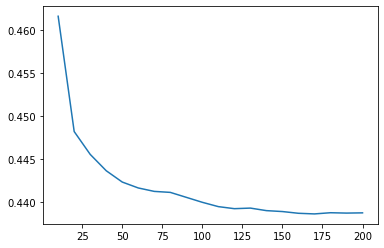

In [49]:

plt.plot(df_scores.n_estimators, df_scores.rmsea)

After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

the RMSE stopped improving after 120 value of the n_estimator.

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [51]:
for m in [10, 15, 20, 25]:
  score = []
  for n in range(10, 201, 10):
    rfr = RandomForestRegressor(n_estimators=n, max_depth=m, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)

    y_pred = rfr.predict(X_val)

    rmse = mean_squared_error(y_val, y_pred, squared=False)
    score.append(rmse)
    
    list_rmse.append((m, n, rmse))
  
  print("average RMSE for max_depth = {:d} is {:f}".format(m, (sum(score)/len(score))))
  print("")

average RMSE for max_depth = 10 is 0.440595

average RMSE for max_depth = 15 is 0.437851

average RMSE for max_depth = 20 is 0.440294

average RMSE for max_depth = 25 is 0.441573



The best max_depth for low RMSEA is 10.

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

In [52]:
  score = []
  for n in range(10, 201, 10):
    rfr = RandomForestRegressor(n_estimators=n, max_depth=15, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)

    y_pred = rfr.predict(X_val)

    rmse = mean_squared_error(y_val, y_pred, squared=False)
    score.append(rmse)
    
    list_rmse.append((m, n, rmse))
  
  print("average RMSE for random_state = {:d} is {:f}".format(m, (sum(score)/len(score))))
  print("")

average RMSE for random_state = 25 is 0.437851



Yes, the answer is different if change the seed for the model

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [53]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

feature_importances = []
for i in range(15):
  feature_importances.append((dv.get_feature_names()[i], rfr.feature_importances_[i]))

df_fi = pd.DataFrame(feature_importances, columns=["feature_name", "feature_importances"])

In [54]:
df_fi

,feature_name,feature_importances
0,availability_365,0.076264
1,calculated_host_listings_count,0.030102
2,latitude,0.152775
3,longitude,0.154101
4,minimum_nights,0.053252
5,neighbourhood_group=Bronx,0.000265
6,neighbourhood_group=Brooklyn,0.000966
7,neighbourhood_group=Manhattan,0.034047
8,neighbourhood_group=Queens,0.001166
9,neighbourhood_group=Staten Island,0.000084


What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

The most important feature is room_type=Entire home/apt

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [56]:
!pip install xgboost

  Using cached xgboost-1.5.0-py3-none-win_amd64.whl (106.6 MB)


In [58]:
import xgboost as xgb
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [59]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

y_pred = model.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False)

In [60]:
rmse

0.43621034591295677

Now change `eta` first to `0.1` and then to `0.01`

In [62]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

y_pred = model.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False)


In [63]:
print(rmse)

0.43249655247991464


In [64]:
%%capture output
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

y_pred = model.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False)

In [65]:
print(rmse)

1.630452438951798


Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.



eta with value 0.1 leads to the best RMSE score